In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
nus = np.arange(0., 1. + .2, .2)
gs = np.arange(0., 1. + .2, .2)

nu_labels = ['0', '0.2', '0.4', '0.6', '0.8', '1']
g_labels = ['0', '0.2', '0.4', '0.6', '0.8', '1']

experiments = []
for nu_label in nu_labels:
    for g_label in g_labels:
        experiments.append(f'nu_{nu_label}_g_{g_label}')
experiments

['nu_0_g_0',
 'nu_0_g_0.2',
 'nu_0_g_0.4',
 'nu_0_g_0.6',
 'nu_0_g_0.8',
 'nu_0_g_1',
 'nu_0.2_g_0',
 'nu_0.2_g_0.2',
 'nu_0.2_g_0.4',
 'nu_0.2_g_0.6',
 'nu_0.2_g_0.8',
 'nu_0.2_g_1',
 'nu_0.4_g_0',
 'nu_0.4_g_0.2',
 'nu_0.4_g_0.4',
 'nu_0.4_g_0.6',
 'nu_0.4_g_0.8',
 'nu_0.4_g_1',
 'nu_0.6_g_0',
 'nu_0.6_g_0.2',
 'nu_0.6_g_0.4',
 'nu_0.6_g_0.6',
 'nu_0.6_g_0.8',
 'nu_0.6_g_1',
 'nu_0.8_g_0',
 'nu_0.8_g_0.2',
 'nu_0.8_g_0.4',
 'nu_0.8_g_0.6',
 'nu_0.8_g_0.8',
 'nu_0.8_g_1',
 'nu_1_g_0',
 'nu_1_g_0.2',
 'nu_1_g_0.4',
 'nu_1_g_0.6',
 'nu_1_g_0.8',
 'nu_1_g_1']

In [3]:
t_lim = 10

In [4]:
critical_values = {}
for experiment in experiments:
    with open(f'results/different_correlations/results_{experiment}.json', 'r') as f:
        results = json.load(f)
    N = results['N']
    nruns = results['nruns']
    crange = np.linspace(*results['crange'])
    print(f'{experiment}: {N} {nruns} {results["crange"]}')
    results = results['results']

    T = []
    for result in results:
        T.append(np.mean([
            max(item['t'] for item in run['cascade'])
            for run in result['runs']
        ]))

    max_t = max(item['t']
                for result in results
                for run in result['runs']
                for item in run['cascade'])
    
    n_ap = {t: [] for t in range(max_t + 1)}
    gcc_size = {t: [] for t in range(max_t + 1)}

    for result in results:

        n_ap_loc = {t: 0 for t in range(max_t + 1)}
        gcc_size_loc = {t: 0 for t in range(max_t + 1)}
        num_gcc_t = {t: 0 for t in range(max_t + 1)}

        for run in result['runs']:
            for item in run['cascade']:

                n_ap_loc[item['t']] += item['n_ap']
                gcc_size_loc[item['t']] += item['gcc_size']
                num_gcc_t[item['t']] += 1

        for t in range(max_t + 1):

            n_ap[t].append(n_ap_loc[t] / nruns / N)
            gcc_size[t].append(gcc_size_loc[t] / num_gcc_t[t] / N
                            if num_gcc_t[t]
                            else gcc_size[t - 1][-1])
    
    t = min(10, max_t)
    critical_values[experiment] = {
        # 'c_crit': crange[np.argmax(n_ap[t])],
        'c_crit': crange[np.argmax(T)],
        't': t,
    }

lambda_2.5: 100000 10 [0.0, 20.0, 200]
lambda_2.5_3: 100000 10 [0.0, 12.0, 200]
lambda_2.5_3.5: 100000 10 [0.0, 12.0, 200]
lambda_2.5_4: 100000 10 [0.0, 12.0, 200]
lambda_3: 100000 10 [0.0, 12.0, 200]
lambda_3_3.5: 100000 10 [0.0, 12.0, 200]
lambda_3_4: 100000 10 [0.0, 12.0, 200]
lambda_3.5: 100000 10 [0.0, 12.0, 200]
lambda_3.5_4: 100000 10 [0.0, 12.0, 200]
lambda_4: 100000 10 [0.0, 12.0, 200]


In [5]:
critical_values

{'lambda_2.5': {'c_crit': 13.869346733668342, 't': 10},
 'lambda_2.5_3': {'c_crit': 11.336683417085426, 't': 10},
 'lambda_2.5_3.5': {'c_crit': 10.733668341708542, 't': 10},
 'lambda_2.5_4': {'c_crit': 10.4321608040201, 't': 10},
 'lambda_3': {'c_crit': 8.442211055276381, 't': 10},
 'lambda_3_3.5': {'c_crit': 7.71859296482412, 't': 10},
 'lambda_3_4': {'c_crit': 7.417085427135678, 't': 10},
 'lambda_3.5': {'c_crit': 6.994974874371859, 't': 10},
 'lambda_3.5_4': {'c_crit': 6.693467336683417, 't': 10},
 'lambda_4': {'c_crit': 6.331658291457286, 't': 10}}

In [6]:
c_crit = [
    [
        critical_values['lambda_2.5']['c_crit'],
        critical_values['lambda_2.5_3']['c_crit'],
        critical_values['lambda_2.5_3.5']['c_crit'],
        critical_values['lambda_2.5_4']['c_crit'],
    ],
    [
        critical_values['lambda_2.5_3']['c_crit'],
        critical_values['lambda_3']['c_crit'],
        critical_values['lambda_3_3.5']['c_crit'],
        critical_values['lambda_3_4']['c_crit'],
    ],
    [
        critical_values['lambda_2.5_3.5']['c_crit'],
        critical_values['lambda_3_3.5']['c_crit'],
        critical_values['lambda_3.5']['c_crit'],
        critical_values['lambda_3.5_4']['c_crit'],
    ],
    [
        critical_values['lambda_2.5_4']['c_crit'],
        critical_values['lambda_3_4']['c_crit'],
        critical_values['lambda_3.5_4']['c_crit'],
        critical_values['lambda_4']['c_crit'],
    ]
]
c_crit = np.array(c_crit)
c_crit

array([[13.86934673, 11.33668342, 10.73366834, 10.4321608 ],
       [11.33668342,  8.44221106,  7.71859296,  7.41708543],
       [10.73366834,  7.71859296,  6.99497487,  6.69346734],
       [10.4321608 ,  7.41708543,  6.69346734,  6.33165829]])

In [7]:
c_crit == c_crit.T

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [8]:
plt.rc('text', usetex=True)
plt.rc('font', size=22, **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['savefig.bbox'] = 'tight'

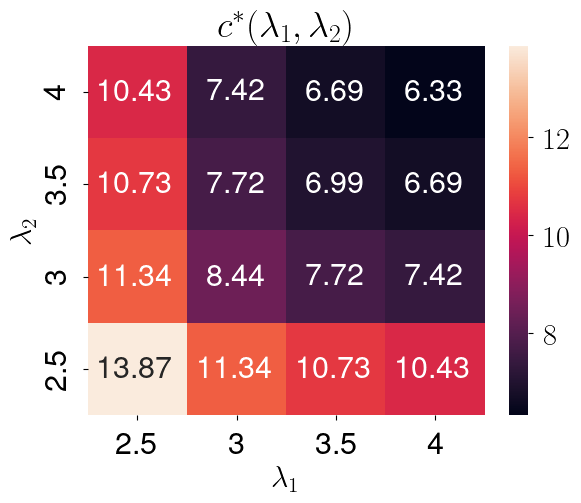

In [15]:
# ticklabels = [fr'${lamb}$' for lamb in lambdas]
ticklabels = lambdas
# annot = []
# for i in c_crit[::-1, :]:
#     annot.append([])
#     for j in i:
#         annot[-1].append(fr'${round(j, 2)}$')
ax = sns.heatmap(
    c_crit[::-1, :],
    xticklabels=ticklabels,
    yticklabels=list(reversed(ticklabels)),
    annot=True,
    fmt='.2f',
)
ax.set_xlabel(r'$\lambda_1$')
ax.set_ylabel(r'$\lambda_2$')
ax.set_title(r'$c^*(\lambda_1, \lambda_2)$')
ax.get_figure().savefig('lambda_phase_space.pdf')